# Run On Google Colab

In [1]:
# !pip install wget # Run if module wget not found

In [2]:
import numpy as np
import wget
import zipfile
from tqdm import tqdm
import os
import shutil

In [3]:
if os.path.isfile('rockpaperscissors.zip'):
    print("File Sudah ada")
else:
    wget.download(
        url='https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip'
    )
    print("\nDownload Selesai")

File Sudah ada


In [4]:
if os.path.exists('rockpaperscissors/'):
    print("File Sudah di extract")
else:
    with zipfile.ZipFile('rockpaperscissors.zip', mode='r') as zip_file:
        for zf in tqdm(zip_file.infolist(), desc="Extracting"):
            try:
                zip_file.extract(zf)                
            except Exception as e:
                print(e)
    zip_file.close()
    shutil.rmtree('__MACOSX/')
    shutil.rmtree('rockpaperscissors/rps-cv-images')
    os.remove('rockpaperscissors/README_rpc-cv-images.txt')
    print("Proses extract berhasil")

File Sudah di extract


In [5]:
path = 'rockpaperscissors/'
path_dict = {}
for i in os.listdir(path):
    path_dict[i] = os.listdir(os.path.join(path, i))
    print(i, "=> sebanyak ", len(os.listdir(os.path.join(path, i))))

paper => sebanyak  712
rock => sebanyak  726
scissors => sebanyak  750


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
numbers_dict = {key: len(value) for key, value in path_dict.items()}
numbers_dict

{'paper': 712, 'rock': 726, 'scissors': 750}

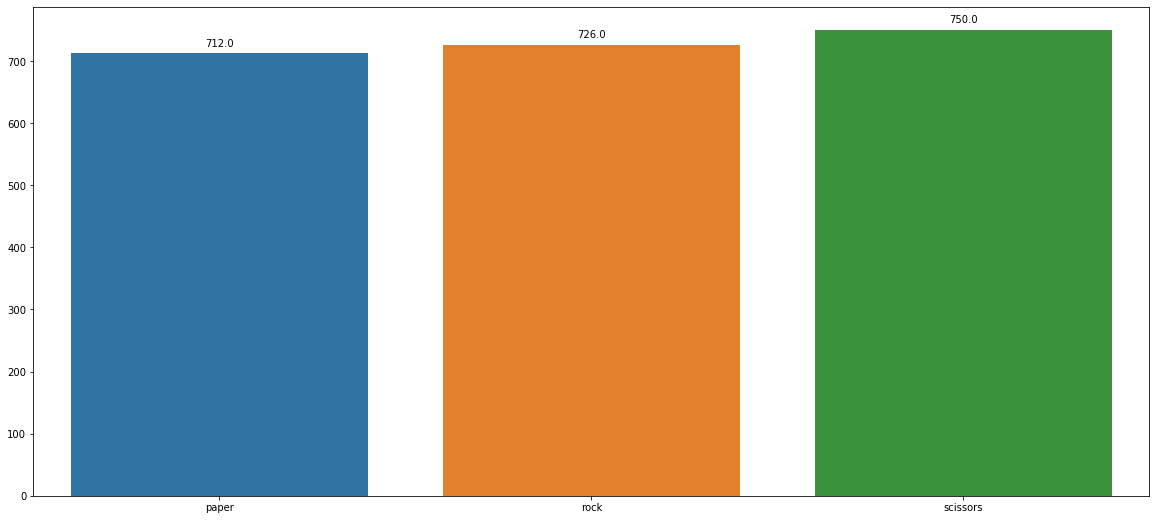

In [33]:
plt.figure(figsize=(20,9))
splot = sns.barplot(list(range(len(numbers_dict))), list(numbers_dict.values()),)
plt.xticks(list(range(len(numbers_dict))), list(numbers_dict.keys()))
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

`Tidak Imbalance`

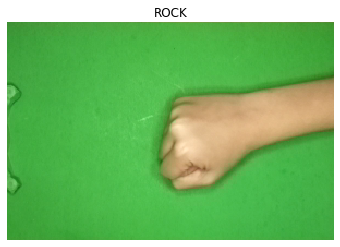

In [41]:
classes = os.listdir(path)
idx_classes = np.random.randint(0, len(classes))
values = os.listdir(os.path.join(path, classes[idx_classes]))
idx_values = np.random.randint(0,50)
new_path = os.path.join(path, classes[idx_classes])
img = plt.imread(os.path.join(new_path, values[idx_values]))
plt.imshow(img)
plt.title(classes[idx_classes].upper())
plt.axis(False)
plt.show()

### Make function to split data

In [42]:
def split_data(data, train_size=0.8, random_seed=42):

    """Fungsi ini untuk memisahkan data menjadi train set dan validation_set
    dengan urutan hasil return : data_train, data_validasi"""
    np.random.seed(int(random_seed))
    test_size=1-train_size
    panjang_train = int(train_size*len(data))
    panjang_val = int(test_size*len(data))
    selisih =len(data) - (panjang_train + panjang_val)
    # print(len(data), " - ( ",panjang_train, " + ", panjang_val," ) = ",selisih)
    if selisih > 0:
        panjang_val +=selisih
      
    data_train = []
    #memilih data train dari data
    while len(data_train) != panjang_train:
        bantu = np.random.randint(0, (len(data)-1))
        if data[bantu] not in data_train:
            data_train.append(data[bantu])
            del data[bantu]
     
    #Sisanya Dicopy kedalam Train
    data_validasi = data.copy()
    del data
    
    print("\nPanjang train : ",panjang_train)
    print("Panjang validasi : ",panjang_val,"\n")
    return data_train, data_validasi

### Make function to move data

In [43]:
def move(data_train, data_val, data_path, train_path, val_path):
    import shutil
    """Fungsi ini untuk membuat folder penyimpanan dan 
    memasukan data yang telah dipisahkan dengan folder tersebut"""
     
    #Memeriksa apakan folder sudah ada, jika belum maka tambahkan folder
    if not (os.path.exists(train_path) and os.path.exists(val_path)):
        os.makedirs(train_path)
        os.makedirs(val_path)
    else:
        print('Folder Sudah ada')
             
    #memindahkan ke folder terpisah
    for i in range(len(data_train)):
        shutil.move(os.path.join(data_path, data_train[i]), os.path.join(train_path, data_train[i]))
     
    #memindahkan ke folder terpisah
    for i in range(len(data_val)):
        shutil.move(os.path.join(data_path, data_val[i]), os.path.join(val_path, data_val[i]))

### Make function to split and move data

In [44]:
def split_and_move_data(path='', random_seed=42, train_size=0.8):
    path_dict = {}
    for i in os.listdir(path):
        path_dict[i] = os.listdir(os.path.join(path, i))
        print(i, "=> sebanyak ", len(os.listdir(os.path.join(path, i))))
      
    dict_train_test = {}
    for cls in path_dict.keys():
        dict_train_test[cls] = split_data(path_dict[cls],random_seed=random_seed,train_size=train_size)
     
    for cls in path_dict.keys():
        move(
           data_train =  dict_train_test[cls][0],
           data_val = dict_train_test[cls][1],
           data_path = os.path.join(path, cls),
           train_path = os.path.join(os.path.join(path,'train'),cls),
           val_path = os.path.join(os.path.join(path,'test'),cls)
        )
        shutil.rmtree(os.path.join(path, cls))
    len_train = 0
    len_test = 0
    train = os.path.join(path,'train')
    test = os.path.join(path,'test')
    for cls in os.listdir(train):
        len_train += len(os.listdir((os.path.join(train,cls))))
        len_test += len(os.listdir((os.path.join(test,cls))))       
     
    print('train : {} data'.format(len_train))
    print('test  : {} data'.format(len_test))    

### Split and move data 
`so that the folder structure becomes :`
```folder
    test
        class_1
        class_2
        .
        .
        class_n
    train
        class_1
        class_2
        .
        .
        class_n
```

In [45]:
split_and_move_data('rockpaperscissors/', train_size=0.9)

paper => sebanyak  712
rock => sebanyak  726
scissors => sebanyak  750

Panjang train :  640
Panjang validasi :  72 


Panjang train :  653
Panjang validasi :  73 


Panjang train :  675
Panjang validasi :  75 

train : 1968 data
test  : 220 data


In [52]:
import tensorflow as tf
from tensorflow import keras

In [53]:
train_dir = os.path.join('rockpaperscissors/train')
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
    rotation_range=90,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.2) # set validation split

In [54]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training') # set as training data
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 1575 images belonging to 3 classes.
Found 393 images belonging to 3 classes.


In [49]:
model = keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.4),  
    keras.layers.Conv2D(64, (3,3), activation='relu'), 
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.4),  
    # Flatten the results to feed into a DNN
    keras.layers.Flatten(), 
    # 512 neuron hidden layer
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    #Output layer
    keras.layers.Dense(3, activation='softmax')  
])

In [55]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [57]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callback=EarlyStopping(monitor="val_loss",patience=50, verbose=1, mode='min')
check_point = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=100,
                              verbose=1,
                              callbacks=[callback, check_point])

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 50 steps, validate for 13 steps
Epoch 1/100
49/50 [============================>.] - ETA: 1s - loss: 1.1579 - accuracy: 0.3273
Epoch 00001: val_accuracy improved from -inf to 0.34351, saving model to best_model.h5
50/50 [==============================] - 77s 2s/step - loss: 1.1567 - accuracy: 0.3308 - val_loss: 1.0983 - val_accuracy: 0.3435
Epoch 2/100
49/50 [============================>.] - ETA: 0s - loss: 1.0985 - accuracy: 0.3428
Epoch 00002: val_accuracy did not improve from 0.34351
50/50 [==============================] - 17s 334ms/step - loss: 1.0986 - accuracy: 0.3429 - val_loss: 1.0981 - val_accuracy: 0.3435
Epoch 3/100
49/50 [============================>.] - ETA: 0s - loss: 1.0985 - accuracy: 0.3454
Epoch 00003: val_accuracy did not improve from 0.34351
50/50 [==============================] - 18s 354ms/step - loss: 1.0986 - accuracy: 0.3429 - val_loss: 1.0981 - val_accuracy: 0.3435
Epoch 4/100
49/50 [============================>.] - ETA: 0s - loss: 1.0988 - accur

Epoch 30/100
49/50 [============================>.] - ETA: 0s - loss: 1.0986 - accuracy: 0.3428
Epoch 00030: val_accuracy did not improve from 0.34351
50/50 [==============================] - 24s 471ms/step - loss: 1.0986 - accuracy: 0.3429 - val_loss: 1.0980 - val_accuracy: 0.3435
Epoch 31/100
49/50 [============================>.] - ETA: 0s - loss: 1.0986 - accuracy: 0.3435
Epoch 00031: val_accuracy did not improve from 0.34351
50/50 [==============================] - 22s 437ms/step - loss: 1.0986 - accuracy: 0.3429 - val_loss: 1.0981 - val_accuracy: 0.3435
Epoch 32/100
49/50 [============================>.] - ETA: 0s - loss: 1.0985 - accuracy: 0.3441
Epoch 00032: val_accuracy did not improve from 0.34351
50/50 [==============================] - 21s 424ms/step - loss: 1.0986 - accuracy: 0.3429 - val_loss: 1.0981 - val_accuracy: 0.3435
Epoch 33/100
49/50 [============================>.] - ETA: 0s - loss: 1.0985 - accuracy: 0.3428
Epoch 00033: val_accuracy did not improve from 0.34351


Epoch 59/100
49/50 [============================>.] - ETA: 0s - loss: 1.0986 - accuracy: 0.3428
Epoch 00059: val_accuracy did not improve from 0.34351
50/50 [==============================] - 24s 484ms/step - loss: 1.0986 - accuracy: 0.3429 - val_loss: 1.0982 - val_accuracy: 0.3435
Epoch 60/100
49/50 [============================>.] - ETA: 0s - loss: 1.0986 - accuracy: 0.3402
Epoch 00060: val_accuracy did not improve from 0.34351
50/50 [==============================] - 24s 474ms/step - loss: 1.0985 - accuracy: 0.3429 - val_loss: 1.0981 - val_accuracy: 0.3435
Epoch 61/100
14/50 [=======>......................] - ETA: 13s - loss: 1.0997 - accuracy: 0.3125